### 1. Membaca Dataset

In [2]:
# Mengimport library pandas untuk membaca dataset
import pandas as pd

# baca dataset csv menggunakan syntax pd.read_csv()
df = pd.read_csv('/content/student_admission_record_dirty.csv')

In [3]:
df

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
...,...,...,...,...,...,...,...
152,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
153,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
154,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
155,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


### 2. Ringkasan Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


### 3. Mengecek Data yang Hilang (Missing Value)

In [5]:
# mengecek missing value
df.isna().sum()

,0
Name,10
Age,10
Gender,10
Admission Test Score,11
High School Percentage,11
City,10
Admission Status,10


**Observasi:**

Dari informasi yang kita dapatkan pada data terdapat beberapa data yang hilang pada kolom `name`, `country`, `review_head`, dan `review_body`

In [6]:
# cek statiscial summary
df.describe()

,Age,Admission Test Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,19.680272,77.657534,75.684726
std,4.540512,16.855343,17.368014
min,-1.000000,-5.000000,-10.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,150.000000,110.500000


In [7]:
# cek statiscial summary
df['City'].describe()

,City
count,147
unique,7
top,Quetta
freq,30


**Observasi:**
* Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom


In [8]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

/tmp/ipython-input-8-3213337050.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-8-3213337050.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [9]:
# cek kembali missing value
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Admission Test Score,0
High School Percentage,0
City,0
Admission Status,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    157 non-null    object 
 1   Age                     157 non-null    float64
 2   Gender                  157 non-null    object 
 3   Admission Test Score    157 non-null    float64
 4   High School Percentage  157 non-null    float64
 5   City                    157 non-null    object 
 6   Admission Status        157 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


###4. Mengatasi Duplikat Data

In [11]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 7


In [12]:
# Handling duplicate
df = df.drop_duplicates()

In [13]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


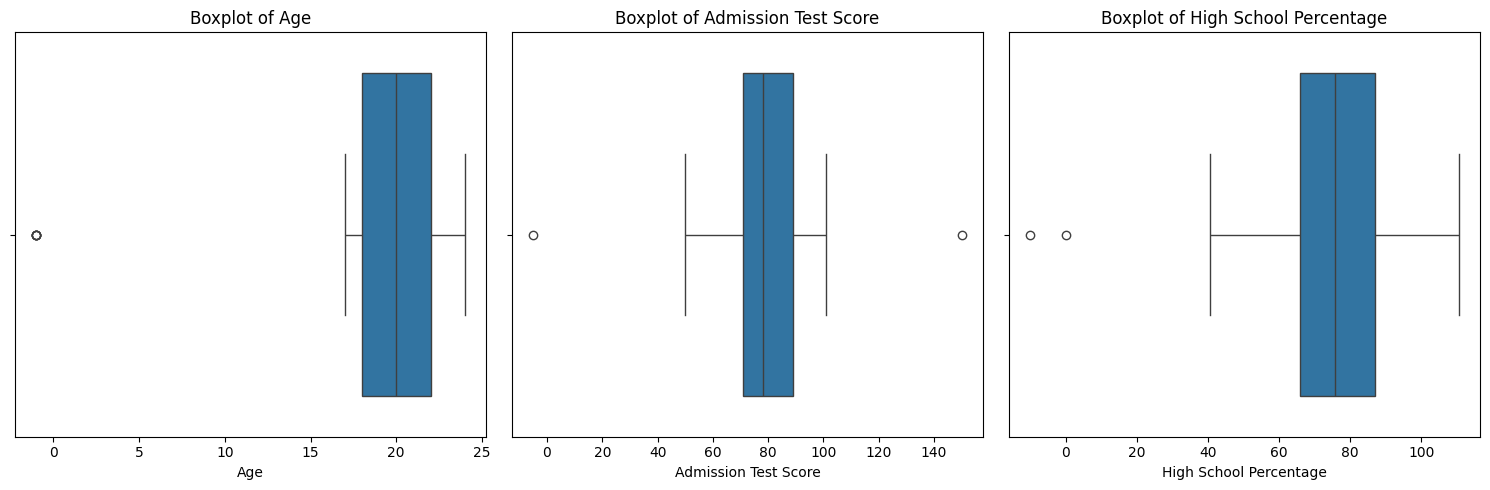

In [14]:
# menggunakan boxplot untuk mendeteksi outlier pada ketiga kolom numerik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# membuat subplot untuk 3 boxplot dalam 1 figure
plt.figure(figsize=(15, 5))

# boxplot Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

# boxplot Admission Test Score
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Admission Test Score'])
plt.title('Boxplot of Admission Test Score')

# boxplot High School Percentage
plt.subplot(1, 3, 3)
sns.boxplot(x=df['High School Percentage'])
plt.title('Boxplot of High School Percentage')

# mengatur layout agar tidak overlap
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import RobustScaler

# inisiasi RobustScaler
scaler = RobustScaler()

# standardisasi untuk ketiga numerical features
numerical_features = ['Age', 'Admission Test Score', 'High School Percentage']

# fit dan transform sekaligus
scaled_data = scaler.fit_transform(df[numerical_features])

# assignment menggunakan .loc untuk menghindari warning
df.loc[:, 'Age_scaled'] = scaled_data[:, 0]
df.loc[:, 'Admission Test Score_scaled'] = scaled_data[:, 1]
df.loc[:, 'High School Percentage_scaled'] = scaled_data[:, 2]

# melihat hasil transformasi
df[['Age', 'Age_scaled', 'Admission Test Score', 'Admission Test Score_scaled',
    'High School Percentage', 'High School Percentage_scaled']].head()

/tmp/ipython-input-15-859254880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Age_scaled'] = scaled_data[:, 0]
/tmp/ipython-input-15-859254880.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Admission Test Score_scaled'] = scaled_data[:, 1]
/tmp/ipython-input-15-859254880.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Age,Age_scaled,Admission Test Score,Admission Test Score_scaled,High School Percentage,High School Percentage_scaled
0,24.0,1.00,50.0,-1.555556,68.900000,-0.320677
1,21.0,0.25,99.0,1.166667,60.730000,-0.706829
2,17.0,-0.75,89.0,0.611111,75.684726,0.000000
3,17.0,-0.75,55.0,-1.277778,85.290000,0.453989
4,20.0,0.00,65.0,-0.722222,61.130000,-0.687923


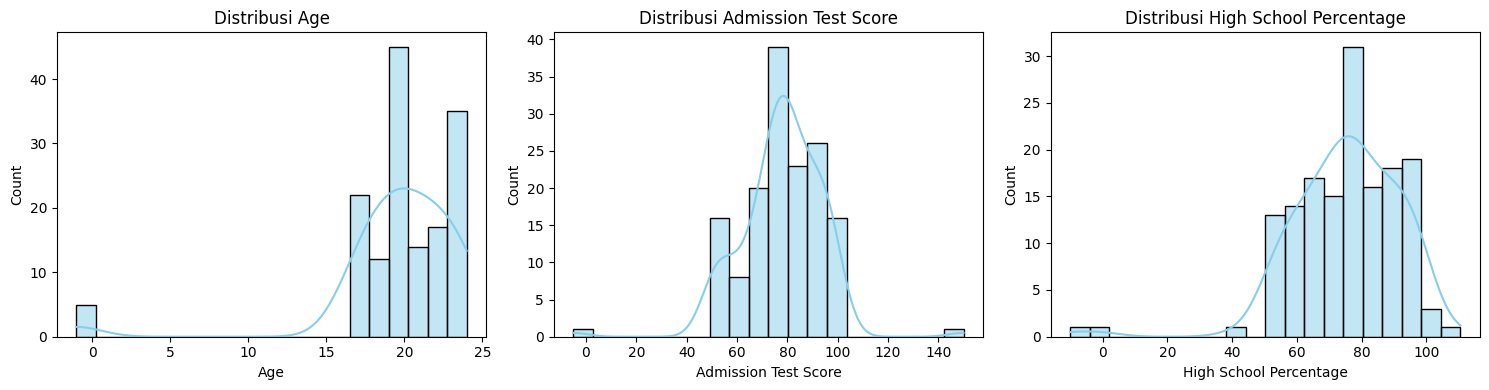

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List fitur numerik
num_cols = ['Age', 'Admission Test Score', 'High School Percentage']

# Plot histogram
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
  plt.subplot(1, 3, i+1)
  sns.histplot(df[col], kde=True, bins=20, color='skyblue')
  plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

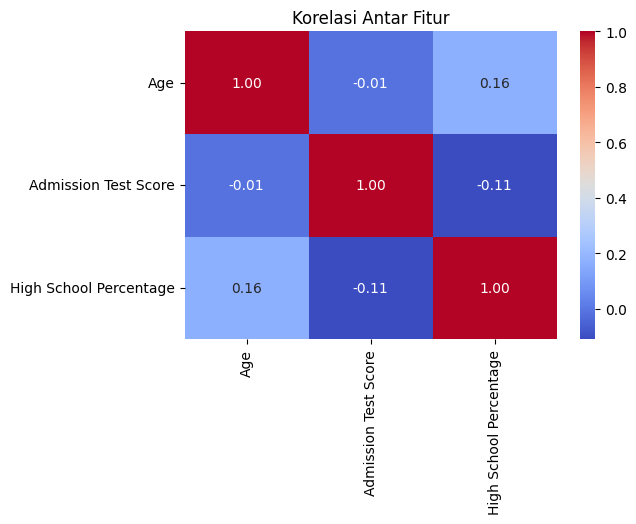

In [17]:
# Hitung korelasi
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

Model: Logistic Regression
Akurasi: 0.47
              precision    recall  f1-score   support

    Accepted       0.38      0.73      0.50        11
    Rejected       0.67      0.32      0.43        19

    accuracy                           0.47        30
   macro avg       0.52      0.52      0.46        30
weighted avg       0.56      0.47      0.45        30

Model: Decision Tree
Akurasi: 0.53
              precision    recall  f1-score   support

    Accepted       0.42      0.73      0.53        11
    Rejected       0.73      0.42      0.53        19

    accuracy                           0.53        30
   macro avg       0.57      0.57      0.53        30
weighted avg       0.61      0.53      0.53        30

Model: Random Forest
Akurasi: 0.67
              precision    recall  f1-score   support

    Accepted       0.53      0.73      0.62        11
    Rejected       0.80      0.63      0.71        19

    accuracy                           0.67        30
   macro avg     

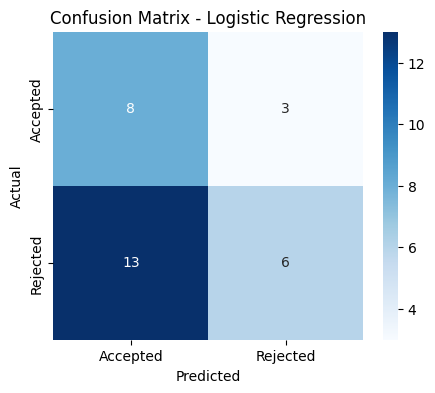

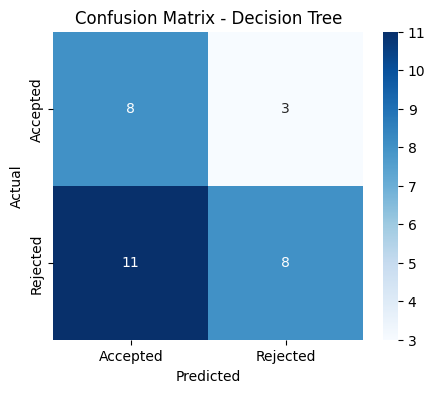

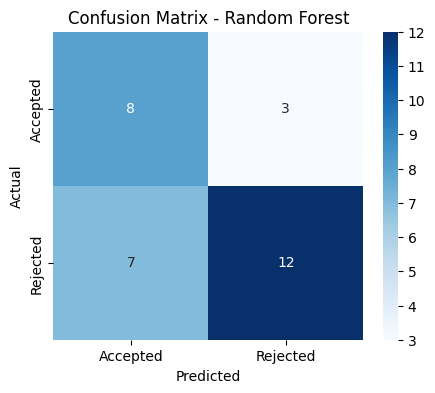

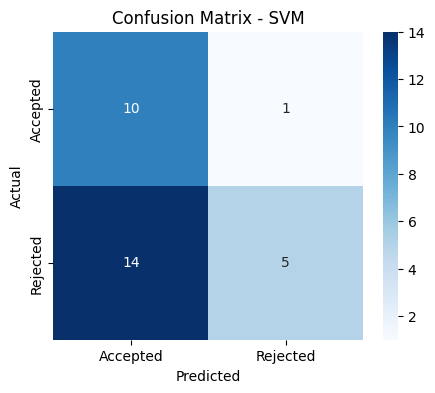

In [ ]:
# =========================================
# 1) IMPORT LIBRARY
# =========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================
# 2) LOAD & CLEAN DATA
# =========================================
data = pd.read_csv("student_admission_record_dirty.csv")

# buang kolom Name
data.drop(columns=["Name"], inplace=True)

# drop target yang kosong
data = data.dropna(subset=["Admission Status"])

# isi missing nilai numerik
for col in ["Age", "Admission Test Score", "High School Percentage"]:
    data[col] = data[col].fillna(data[col].median())

# isi missing nilai kategorik
for col in ["Gender", "City"]:
    data[col] = data[col].fillna(data[col].mode()[0])

# encode target
le_target = LabelEncoder()
data["Admission Status"] = le_target.fit_transform(data["Admission Status"])

# encode Gender & City
data["Gender"] = LabelEncoder().fit_transform(data["Gender"])
data["City"] = LabelEncoder().fit_transform(data["City"])

# =========================================
# 3) SPLIT TRAIN-TEST
# =========================================
X = data.drop(columns=["Admission Status"])
y = data["Admission Status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =========================================
# 4) TRAIN 4 CLASSIFICATION MODELS
# =========================================
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=le_target.classes_)

    results[name] = {
        "accuracy": acc,
        "confusion_matrix": cm,
        "classification_report": cr
    }

    print("="*40)
    print(f"Model: {name}")
    print(f"Akurasi: {acc:.2f}")
    print(cr)

# =========================================
# 5) VISUAL CONFUSION MATRIX
# =========================================
for name, result in results.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()